# Project 1| Intro to Categorical Networks

### By Team VAC

## Introduction into Categorical Nodes


For this project, we explored networks with categorical variables. These categorical variables further describes the Node's purpose or its position in the network. For a example, A school's social network can have two types of nodes. The nodes could be labeled as staff and student nodes with its edges represent the classes and the closness of an average student to a particular staff member.

[Once we find a graph that a bipartite type]


## NCAA Football Data

Our dataset comes from an undirected graph in a graph modeling language (GML) format and has categorical attributes for each node along with edges. 

```
Creator "Mark Newman on Sat Jul 22 05:32:16 2006"
graph
[
  directed 0
  node
  [
    id 0
    label "BrighamYoung"
    value 7
  ]
  node
  [
    id 1
    label "FloridaState"
    value 0
  ]
  node
  [
    id 2
    label "Iowa"
    value 2
  ]
```


In [3]:
#Importing networkx to analyze the divorce network set
import snap
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#
#d=nx.read_pajek("Dining-table_partners.net")
#nx.info(d)

In [16]:
teams =nx.read_gml("football.gml", label='id')
conferences = nx.get_node_attributes(teams, 'value')
team_names = nx.get_node_attributes(teams, 'label')

# color theme for each conference
color_family = {
    0: '#539A3B',
    1: '#9CA5A8',
    2: '#E38157',
    3: '#AA7D5F',
    4: '#333C3E',
    5: '#DD2B37',
    6: '#61AFA8',
    7: '#628FCE',
    8: '#AC8736',
    9: '#28C1DE',
    10: '#B2AE8E',
    11: '#A7BDD7',
    12: '#D7E7C8'
}

for key in conferences:
    conferences[key] = color_family[conferences[key]]

node_colors = conferences.values()



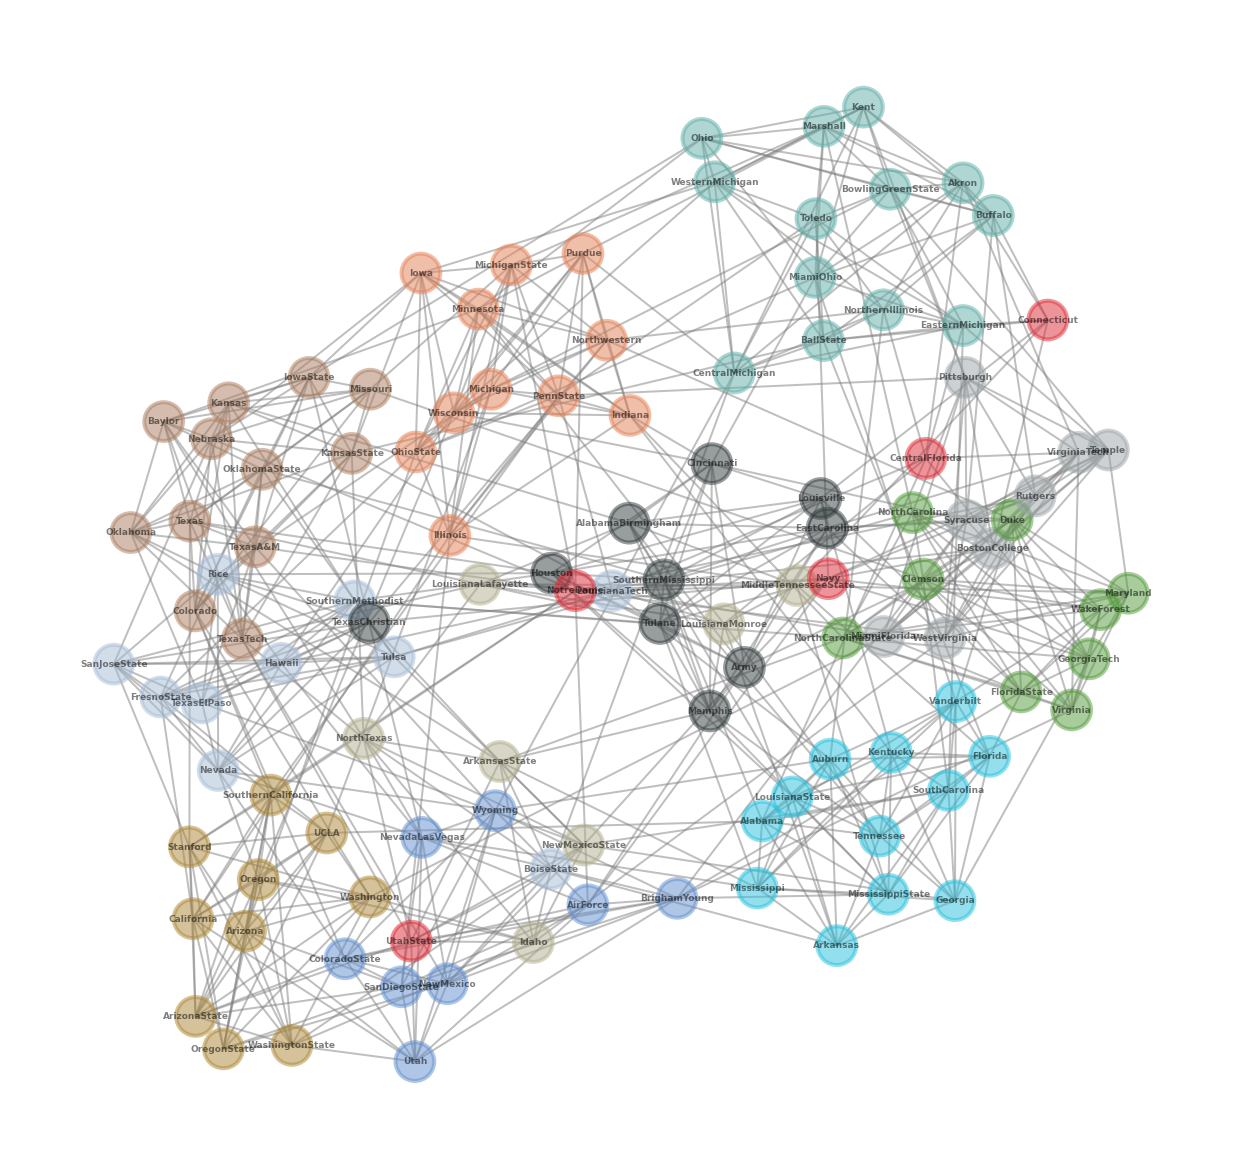

In [15]:

plt.figure(figsize=(22, 22))
ax = plt.gca()
ax.set_aspect('equal')

nx.draw(teams,
        font_size=9,
        font_weight="bold",
        font_color="black",
        node_size=1500, 
        edge_color="grey",
        node_shape="o", 
        alpha=0.5, 
        linewidths=4, 
        width=2,
        node_color=node_colors,
        with_labels=True,
        labels=team_names
       )

plt.show()


In [24]:
# Calculate the degrees of all nodes
sorted_degree = sorted(nx.degree(teams), 
                       key=lambda x: x[1], 
                       reverse=True)
print(sorted_degree[0:4])

[(0, 12), (1, 12), (2, 12), (3, 12)]


In [27]:
# Calculate the Eigenvector degree for all nodes
sorted_eigenvector = sorted(nx.eigenvector_centrality(teams).items(), 
                            key=lambda x: x[1], 
                            reverse=True)
print(sorted_eigenvector[0:4])

[(67, 0.1276829966998084), (53, 0.12257661539574176), (88, 0.12128875621075208), (7, 0.12072375014454013)]
